# 4.2 - Ajuste

### GridSearching  -  CrossValidation


![grid](images/grid.png)

![cv](images/cv.ppm)

In [1]:
import warnings
warnings.simplefilter('ignore')
import numpy as np


from sklearn.datasets import make_circles, load_boston
from sklearn.model_selection import train_test_split as tts

from sklearn.ensemble import RandomForestRegressor as RFR
from sklearn.ensemble import RandomForestClassifier as RFC

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV


def grid(modelo, param, cv=5):
    grid=GridSearchCV(modelo, param, cv=cv, 
                      iid=True, return_train_score=True, n_jobs=-1)
    
    grid.fit(X_train, y_train)
    
    print('Acierto test: {:.2f}'.format(grid.score(X_test, y_test)))
    print('Acierto train: {:.2f}'.format(grid.score(X_train, y_train)))
    print('Mejores parametros: {}'.format(grid.best_params_))
    print('Mejor acierto cv: {:.2f}'.format(grid.best_score_))
    
    return grid.best_estimator_.fit(X_train, y_train)

In [2]:
X=load_boston().data
y=load_boston().target

In [3]:
X_train, X_test, y_train, y_test = tts(X, y, test_size=.2)

In [4]:
rfr=RFR()
rfr.fit(X_train, y_train)

train_score=rfr.score(X_train, y_train)    # R2
test_score=rfr.score(X_test, y_test)

print (train_score, test_score)

0.9805067883705321 0.8627950205076776


In [5]:
param={'max_leaf_nodes':[5,10,20], 'n_estimators':[10,50,100,500]}

In [6]:
grid(rfr, param)

Acierto test: 0.85
Acierto train: 0.94
Mejores parametros: {'max_leaf_nodes': 20, 'n_estimators': 100}
Mejor acierto cv: 0.84


RandomForestRegressor(max_leaf_nodes=20)

In [7]:
modelo=grid(rfr, param)

Acierto test: 0.85
Acierto train: 0.94
Mejores parametros: {'max_leaf_nodes': 20, 'n_estimators': 100}
Mejor acierto cv: 0.84


In [8]:
modelo.predict(X_test)

array([21.76904993, 13.02344738, 16.11744351, 21.20108478, 13.63258983,
       21.47985416, 24.19450145, 34.25638274, 14.7634611 , 15.83674864,
       43.66362495, 14.80908008, 20.6412614 , 46.71039293, 20.93542187,
       24.61976969, 15.30165552, 22.0790548 , 22.05733524, 10.55604913,
       37.9406276 , 25.95304486, 17.00409035, 22.26004423, 21.06756865,
       21.06565354, 20.51831028, 22.36744618, 23.958185  , 18.84297156,
       23.82259252, 20.61438739,  9.1665539 , 23.75917489, 33.98957384,
       22.54948094, 42.26212465, 19.46947959, 35.01891974, 25.24061286,
       18.39064385, 20.86696326, 18.42886595, 13.80769635, 21.24083031,
       15.24133859, 22.23753421, 36.38275761, 21.11055093, 33.7210833 ,
       14.10410364, 21.56223673, 27.50905093, 13.5897193 , 26.69928771,
       19.76659112, 11.14330102, 16.89946225, 46.5604031 , 21.5925718 ,
       24.13780004, 27.23313132, 16.07478178, 22.5018508 , 23.68252203,
       47.87186643, 20.41917692, 20.63719411, 15.32476495, 20.38

In [9]:
modelo.score(X_test, y_test)

0.8559998697092164

### Random GridSearching

In [10]:
X, y = make_circles(noise=0.2, factor=0.5, random_state=1)

In [11]:
X[:10]

array([[-0.38289117, -0.09084004],
       [-0.02096229, -0.47787416],
       [-0.39611596, -1.28942694],
       [-0.61813018, -0.06383715],
       [ 0.70347838, -0.18703837],
       [-0.45970463,  0.69477465],
       [-0.45091682, -0.71570524],
       [-0.45562004, -0.13406016],
       [-0.26513904,  0.40812871],
       [-0.15474648,  0.41406973]])

In [12]:
y[:10]

array([1, 1, 0, 1, 1, 0, 0, 1, 1, 1])

In [13]:
n_estimators=[int(x) for x in np.linspace(200, 2000, 10)]

max_features=['auto', 'sqrt']

min_samples_split=[2, 5, 10]

bootstrap=[True, False]

In [14]:
random_grid={'n_estimators': n_estimators,
             'max_features': max_features,
             'min_samples_split':min_samples_split,
             'bootstrap': bootstrap}

In [15]:
rfc=RFC()

In [16]:
rf_random=RandomizedSearchCV(estimator=rfc, 
                             param_distributions=random_grid,
                             n_iter=100,
                             cv=3,
                             verbose=10,
                             n_jobs=-1, 
                             scoring='roc_auc')

In [17]:
rf_random.fit(X, y)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    3.6s
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    4.9s
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    9.5s
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:   13.1s
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   19.1s
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   23.7s
[Parallel(n_jobs=-1)]: Done  53 tasks      | elapsed:   30.2s
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:   35.9s
[Parallel(n_jobs=-1)]: Done  77 tasks      | elapsed:   42.5s
[Parallel(n_jobs=-1)]: Done  90 tasks      | elapsed:   50.5s
[Parallel(n_jobs=-1)]: Done 105 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 137 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 173 tasks      | elapsed:  1

RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   scoring='roc_auc', verbose=10)

In [18]:
rf_random.best_estimator_#.fit()

RandomForestClassifier(n_estimators=200)

In [19]:
rf_random.best_score_

0.8864619377162629

In [20]:
rf_random.best_params_

{'n_estimators': 200,
 'min_samples_split': 2,
 'max_features': 'auto',
 'bootstrap': True}

In [21]:
rf_random.cv_results_

{'mean_fit_time': array([3.29632664, 1.21592935, 1.00628885, 0.78121932, 2.2064139 ,
        2.16841825, 2.43814937, 2.42733057, 1.48365005, 1.9943103 ,
        2.88278532, 4.81002204, 1.93234984, 0.4856228 , 3.62025499,
        1.80220135, 1.09579452, 1.93177001, 0.48106734, 0.98533312,
        2.59269373, 4.83750629, 1.08859793, 2.37498339, 0.36183103,
        1.89881587, 3.37632632, 2.3793668 , 2.07435258, 2.04367137,
        3.66384395, 4.02165   , 2.70456092, 0.99010865, 1.4645404 ,
        0.37290494, 3.51318502, 0.38018489, 1.580966  , 3.4999427 ,
        0.99811935, 3.66811625, 1.48873266, 1.01684173, 5.02591554,
        2.98087144, 0.48450605, 1.09915312, 3.25797621, 4.87166874,
        0.72331993, 4.88487069, 0.98319507, 0.37506938, 1.94839223,
        2.2239    , 1.49408786, 1.4847331 , 3.40440416, 3.46738625,
        4.91334112, 1.81122828, 3.86154691, 3.89834785, 0.49174809,
        3.78325407, 3.97196261, 3.44392633, 2.42267267, 1.10031843,
        1.48454603, 3.43580333,

### HyperOpt (GridSearching bayesiano)

In [22]:
#!pip install hyperopt

import pandas as pd
from pandas.plotting import scatter_matrix

import statsmodels.api as sm
from statsmodels.formula.api import ols

import xgboost as xgb
from sklearn.ensemble import RandomForestRegressor as RFR
from sklearn.linear_model import LinearRegression as LinReg

from sklearn.metrics import mean_squared_error as mse
from sklearn.model_selection import train_test_split as tts

In [23]:
df=pd.read_csv('../data/diamonds_train.csv')

df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,1.21,Premium,J,VS2,62.4,58.0,4268,6.83,6.79,4.25
1,0.32,Very Good,H,VS2,63.0,57.0,505,4.35,4.38,2.75
2,0.71,Fair,G,VS1,65.5,55.0,2686,5.62,5.53,3.65
3,0.41,Good,D,SI1,63.8,56.0,738,4.68,4.72,3.00
4,1.02,Ideal,G,SI1,60.5,59.0,4882,6.55,6.51,3.95


In [24]:
df.shape

(40455, 10)

In [25]:
df.cut.unique()

array(['Premium', 'Very Good', 'Fair', 'Good', 'Ideal'], dtype=object)

In [26]:
df.color.unique()

array(['J', 'H', 'G', 'D', 'F', 'E', 'I'], dtype=object)

In [27]:
df.clarity.unique()

array(['VS2', 'VS1', 'SI1', 'SI2', 'IF', 'VVS1', 'VVS2', 'I1'],
      dtype=object)

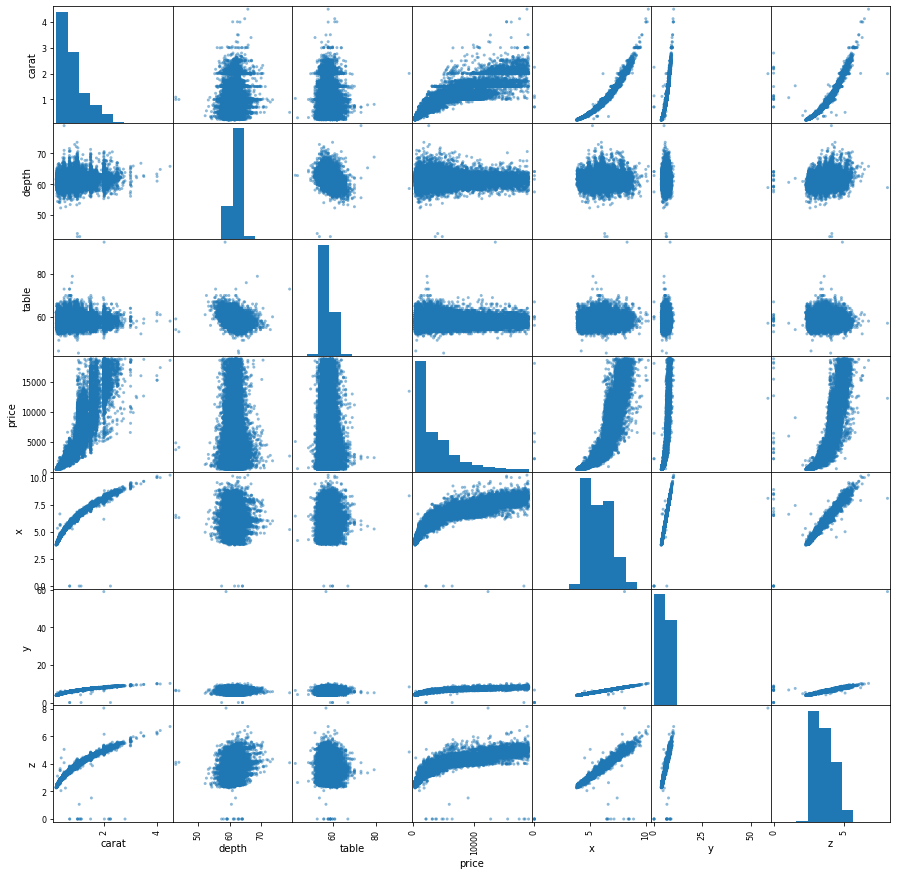

In [28]:
%matplotlib inline 
scatter_matrix(df, figsize=(15, 15));

In [29]:
X=df.drop('price', axis=1)

y=df.price

In [30]:
X.head()

,carat,cut,color,clarity,depth,table,x,y,z
0,1.21,Premium,J,VS2,62.4,58.0,6.83,6.79,4.25
1,0.32,Very Good,H,VS2,63.0,57.0,4.35,4.38,2.75
2,0.71,Fair,G,VS1,65.5,55.0,5.62,5.53,3.65
3,0.41,Good,D,SI1,63.8,56.0,4.68,4.72,3.00
4,1.02,Ideal,G,SI1,60.5,59.0,6.55,6.51,3.95


In [31]:
x=sm.add_constant(X._get_numeric_data())

modelo=sm.OLS(y, x).fit()

modelo.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.860
Model:                            OLS   Adj. R-squared:                  0.860
Method:                 Least Squares   F-statistic:                 4.136e+04
Date:                Thu, 03 Jun 2021   Prob (F-statistic):               0.00
Time:                        13:56:49   Log-Likelihood:            -3.5311e+05
No. Observations:               40455   AIC:                         7.062e+05
Df Residuals:                   40448   BIC:                         7.063e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.152e+04    576.435     37.339      0.000    2.04e+04    2.27e+04
carat       1.067e+04     73.530    145.064      0.000    1.05e+04    1.08e+04
depth       -214.5839      7.619    -28.166      0.000    -229.516    -199.651
table       -101.8176      3.555    -28.639      0.000    -108.786     -94.849
x          -1343.8074     62.684    -21.438      0.000   -1466.669   -1220.946
y             42.9796     29.273      1.468      0.142     -14.396     100.355
z            126.9522     88.089      1.441      0.150     -45.705     299.609
==============================================================================
Omnibus:                    10240.714   Durbin-Watson:                   2.004
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           241364.592
Skew:                           0.670   Prob(JB):                         0.00
Kurtosis:                      14.891   Cond. No.                     6.62e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.62e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [32]:
X=X.drop(columns=['y', 'z'])

In [33]:
X.head()

,carat,cut,color,clarity,depth,table,x
0,1.21,Premium,J,VS2,62.4,58.0,6.83
1,0.32,Very Good,H,VS2,63.0,57.0,4.35
2,0.71,Fair,G,VS1,65.5,55.0,5.62
3,0.41,Good,D,SI1,63.8,56.0,4.68
4,1.02,Ideal,G,SI1,60.5,59.0,6.55


In [34]:
clarity={'I1':0, 'SI2':1, 'SI1':2, 'VS2':3, 'VS1':4, 'VVS2':5, 'VVS1':6, 'IF':7}

cut={'Fair':0, 'Good':1, 'Very Good':2, 'Premium':3, 'Ideal':4}

color={'J':0, 'I':1, 'H':2, 'G':3, 'F':4, 'E':5, 'D':6}

In [35]:
def label(s, dic):
    return dic[s]

In [36]:
X.clarity=X.clarity.apply(lambda x: label(x, clarity))

X.cut=X.cut.apply(lambda x: label(x, cut))

X.color=X.color.apply(lambda x: label(x, color))

In [37]:
X.head()

,carat,cut,color,clarity,depth,table,x
0,1.21,3,0,3,62.4,58.0,6.83
1,0.32,2,2,3,63.0,57.0,4.35
2,0.71,0,3,4,65.5,55.0,5.62
3,0.41,1,6,2,63.8,56.0,4.68
4,1.02,4,3,2,60.5,59.0,6.55


In [38]:
X_train, X_test, y_train, y_test = tts(X, y)

In [39]:
xgbr=xgb.XGBRegressor()

xgbr.fit(X_train, y_train)

xgbr_pred=xgbr.predict(X_test)

mse(xgbr_pred, y_test)**0.5

544.2241644858307

In [40]:
y.max()

18823

In [41]:
y.min()

326

In [42]:
rfr=RFR()

rfr.fit(X_train, y_train)

rfr_pred=rfr.predict(X_test)

mse(rfr_pred, y_test)**0.5

556.73887425967

In [43]:
linreg=LinReg()

linreg.fit(X_train, y_train)

linreg_pred=linreg.predict(X_test)

mse(linreg_pred, y_test)**0.5

1217.6608037974863

In [44]:
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,1.21,Premium,J,VS2,62.4,58.0,4268,6.83,6.79,4.25
1,0.32,Very Good,H,VS2,63.0,57.0,505,4.35,4.38,2.75
2,0.71,Fair,G,VS1,65.5,55.0,2686,5.62,5.53,3.65
3,0.41,Good,D,SI1,63.8,56.0,738,4.68,4.72,3.00
4,1.02,Ideal,G,SI1,60.5,59.0,4882,6.55,6.51,3.95


In [45]:
from sklearn.preprocessing import StandardScaler

In [46]:
X=df.drop('price', axis=1)

y=df.price

In [47]:
X_s=pd.DataFrame(StandardScaler().fit_transform(X._get_numeric_data()), columns=X._get_numeric_data().columns)

X_s.head()

,carat,depth,table,x,y,z
0,0.867006,0.452019,0.247981,0.978807,0.921985,1.022657
1,-1.004557,0.871099,-0.199745,-1.226738,-1.179816,-1.129259
2,-0.184434,2.617265,-1.095198,-0.097286,-0.176882,0.161891
3,-0.815298,1.429872,-0.647472,-0.933258,-0.883296,-0.770607
4,0.467458,-0.875068,0.695707,0.729794,0.677793,0.592274


In [48]:
clarity={'I1':0, 'SI2':1, 'SI1':2, 'VS2':3, 'VS1':6, 'VVS2':8, 'VVS1':10, 'IF':14}

cut={'Fair':0, 'Good':1, 'Very Good':2, 'Premium':5, 'Ideal':8}

color={'J':0, 'I':1, 'H':4, 'G':6, 'F':10, 'E':12, 'D':15}

X_s['clarity']=X.clarity.apply(lambda x: label(x, clarity))

X_s['cut']=X.cut.apply(lambda x: label(x, cut))

X_s['color']=X.color.apply(lambda x: label(x, color))

X_s.head()

,carat,depth,table,x,y,z,clarity,cut,color
0,0.867006,0.452019,0.247981,0.978807,0.921985,1.022657,3,5,0
1,-1.004557,0.871099,-0.199745,-1.226738,-1.179816,-1.129259,3,2,4
2,-0.184434,2.617265,-1.095198,-0.097286,-0.176882,0.161891,6,0,6
3,-0.815298,1.429872,-0.647472,-0.933258,-0.883296,-0.770607,2,1,15
4,0.467458,-0.875068,0.695707,0.729794,0.677793,0.592274,2,8,6


In [49]:
X_train, X_test, y_train, y_test = tts(X_s, y)

In [50]:
xgbr=xgb.XGBRegressor()

xgbr.fit(X_train, y_train)

xgbr_pred=xgbr.predict(X_test)

mse(xgbr_pred, y_test)**0.5

529.9004075313584

In [51]:
# gridsearching bayesiano

from hyperopt import fmin, hp, tpe, Trials, space_eval, STATUS_OK
from hyperopt.pyll import scope as ho_scope
from hyperopt.pyll.stochastic import sample as ho_sample

In [52]:
space={
    
    'n_estimators': hp.quniform('n_estimators', 10, 1000, 25), # uniforme discreta de 10 a 1000 en saltos de 25
    
    'learning_rate': hp.uniform('learning_rate', 0.0001, 1.0), # uniforme continua entre 0.0001 y 1
    
    'gamma': hp.uniform('x_gamma', 0.1, 0.5)
}

In [53]:
def objetivo(space):
    
    modelo=xgb.XGBRegressor(n_estimators=int(space['n_estimators']),
                            learning_rate=space['learning_rate'],
                            gamma=space['gamma'],
                            objective='reg:squarederror'
                           )
    
    eval_set=[(X_train, y_train), (X_test, y_test)]
    
    modelo.fit(X_train, y_train, eval_set=eval_set, eval_metric='rmse', verbose=False)
    
    y_pred=modelo.predict(X_test)
    
    rmse=mse(y_test, y_pred)**0.5
    
    return {'loss': rmse, 'status': STATUS_OK}

In [54]:
mejor=fmin(fn=objetivo, space=space, algo=tpe.suggest, max_evals=10, trials=Trials())

mejor

100%|██████████| 10/10 [10:33<00:00, 63.31s/trial, best loss: 516.4962170494787]


{'learning_rate': 0.08060831107510294,
 'n_estimators': 850.0,
 'x_gamma': 0.15726071873945277}

In [55]:
modelo=xgb.XGBRegressor(n_estimators=int(mejor['n_estimators']), 
                       learning_rate=mejor['learning_rate'], 
                       gamma=mejor['x_gamma'],
                       objective='reg:squarederror')

In [56]:
modelo.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0.15726071873945277,
             gpu_id=-1, importance_type='gain', interaction_constraints='',
             learning_rate=0.08060831107510294, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=850, n_jobs=0, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [57]:
y_pred=modelo.predict(X_test)

mse(y_test, y_pred)**0.5

516.4962170494787

https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.boxcox.html

In [58]:
import h2o
from h2o.automl import H2OAutoML

In [ ]:
h2o.init()

In [ ]:
df=h2o.import_file('../data/diamonds_train.csv')

In [ ]:
X=df.columns
y='price'
X.remove(y)

In [ ]:
df[y]=df[y].asfactor()

In [ ]:
# 20 modelos

aml=H2OAutoML(max_models=3, seed=1)

aml.train(x=X, y=y, training_frame=df)

In [ ]:
lb=aml.leaderboard

lb.head(rows=lb.nrows)

In [ ]:
aml.leader  # mejor modelo

In [ ]:
pred=aml.leader.predict(X)

pred